#  HTRU2 Data Set 

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South).

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

PULS_URL = "https://gitlab.com/emrevoid/uni/dia/project/seintz/-/raw/master/HTRU_2.csv"
response = requests.get(PULS_URL)

file_object = io.StringIO(response.content.decode('utf-8'))

pulsds = pd.read_csv(file_object, header=0, index_col=False, sep=r'\s*,\s*', engine='python')

pulsds.head(5)

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
pulsds["class"].value_counts()

0    16259
1     1639
Name: class, dtype: int64

In [4]:
pulsds["class"].value_counts(normalize=True)

0    0.908426
1    0.091574
Name: class, dtype: float64

In [7]:
pulsds.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


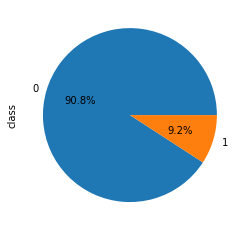

In [9]:
pulsds["class"].value_counts().plot.pie(autopct='%1.1f%%');

In [11]:
pulsds.isna().sum()

Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
class               0
dtype: int64

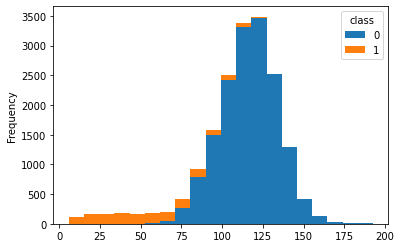

In [12]:
pulsds.pivot(columns="class")["Profile_mean"].plot.hist(bins=20, stacked=True);

In [18]:
class_map = {0: "blue", 1: "red"}
class_color = pulsds["class"].map(class_map)
class_color.head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: class, dtype: object

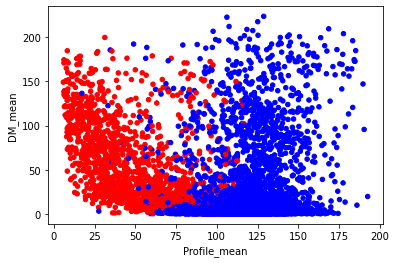

In [20]:
pulsds.plot.scatter("Profile_mean", "DM_mean", c=class_color);

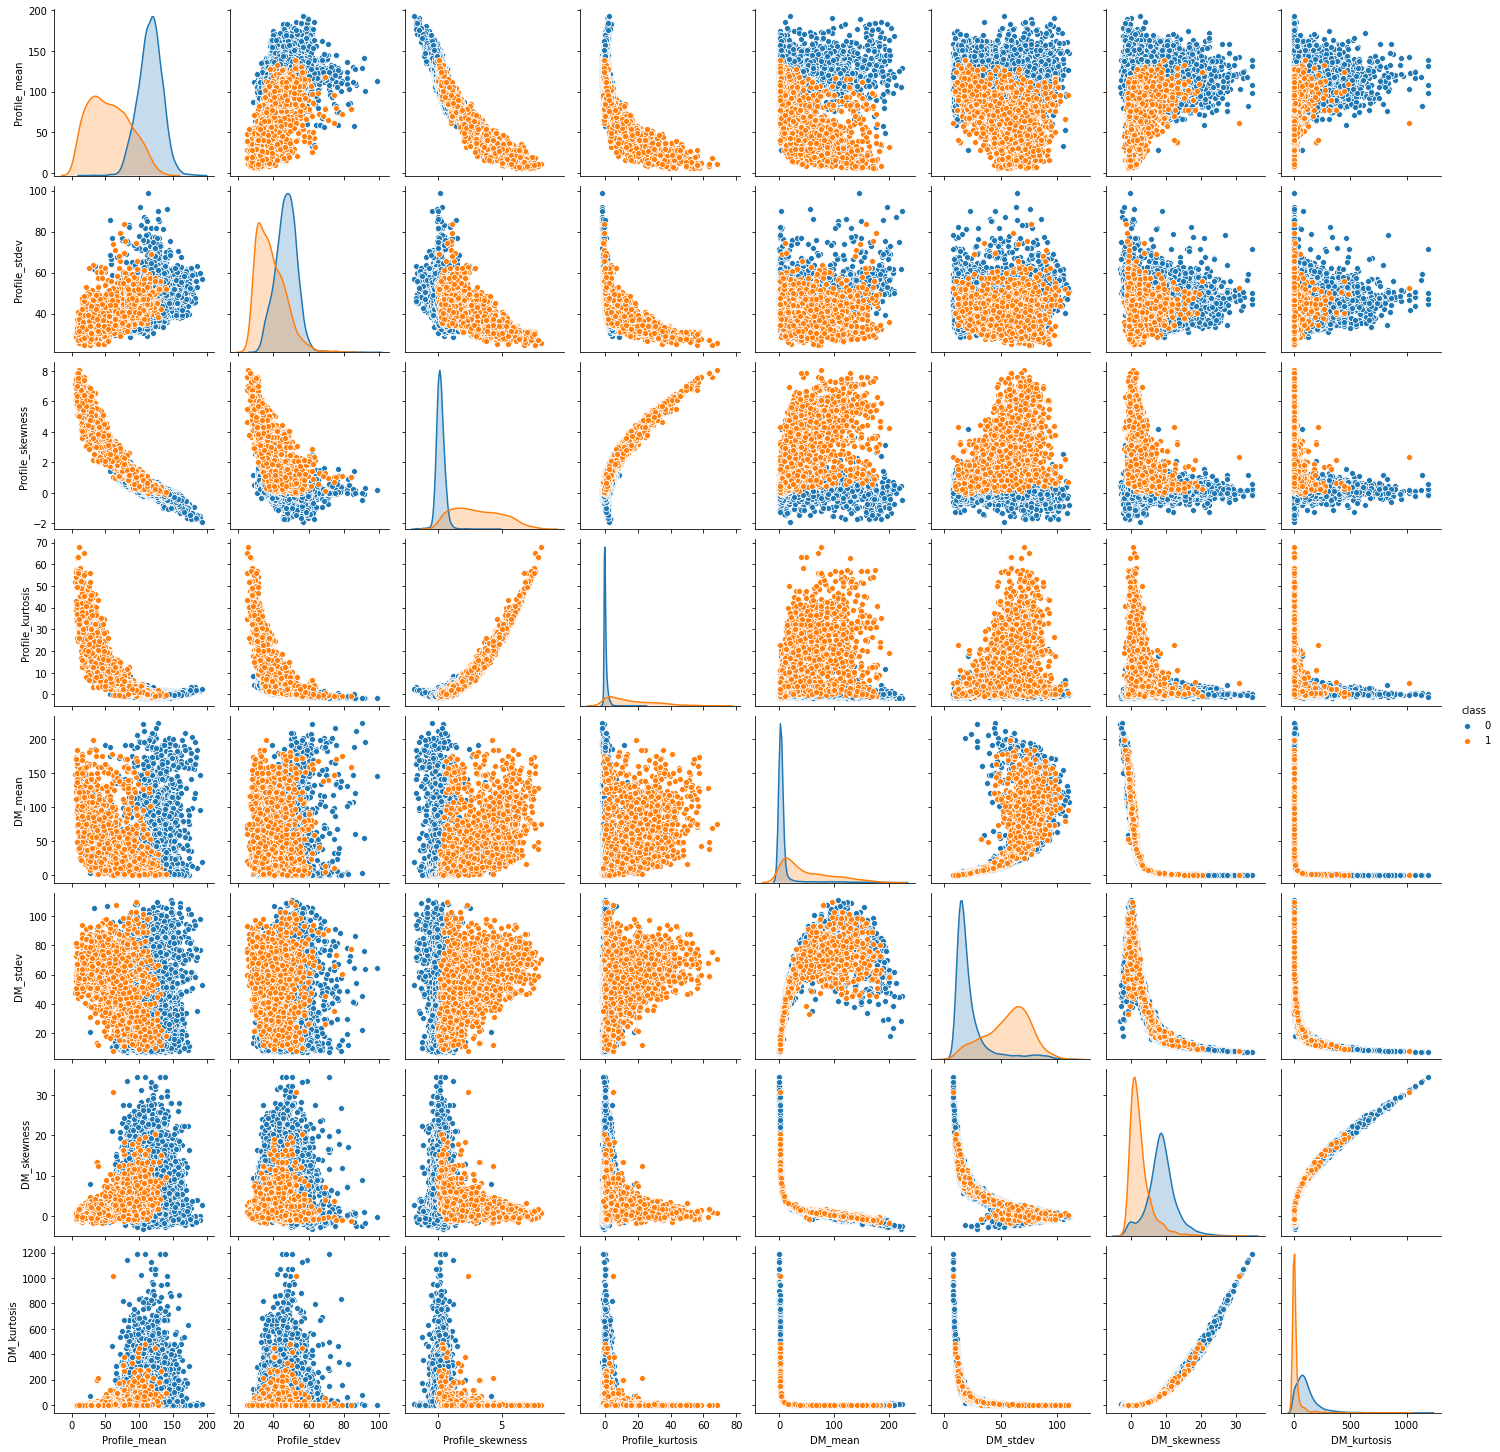

In [24]:
sns.pairplot(data=pulsds, hue="class");

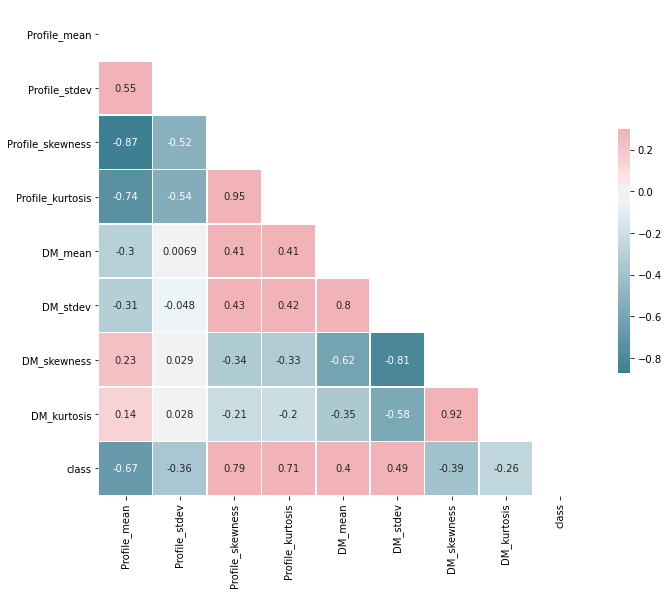

In [25]:
def plot_correlation(dataset):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(dataset, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(dataset, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5});
    
    
plot_correlation(pulsds.corr())